In [1]:
import iris
import numpy as np
import cartopy.util
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Read data
path_to_rono2_emis = Path('../data/rono2_emis')
meono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_meono2_oceanic_emissions.nc'))
etono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_etono2_oceanic_emissions.nc'))
nprono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_nprono2_oceanic_emissions.nc'))
iprono2_oc = iris.load_cube(str(path_to_rono2_emis / 'perpetual_iprono2_oceanic_emissions.nc'))
meono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_meono2_biomass_burning_emissions.nc'))
etono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_etono2_biomass_burning_emissions.nc'))
nprono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_nprono2_biomass_burning_emissions.nc'))
iprono2_bb = iris.load_cube(str(path_to_rono2_emis / 'perpetual_iprono2_biomass_burning_emissions.nc'))
# Path to figures
path_to_figs = Path('../../../results/rono2_oc&bb_emis')

In [3]:
# Add up oceanic and biomass burning emissions
meono2_oc_plus_bb = meono2_oc + meono2_bb
etono2_oc_plus_bb = etono2_oc + etono2_bb
nprono2_oc_plus_bb = nprono2_oc + nprono2_bb
iprono2_oc_plus_bb = iprono2_oc + iprono2_bb
meono2_oc_plus_bb.rename('sum_of_methyl_nitrate_oceanic_and_biomass_burning_emissions')
etono2_oc_plus_bb.rename('sum_of_ethyl_nitrate_oceanic_and_biomass_burning_emissions')
nprono2_oc_plus_bb.rename('sum_of_npropyl_nitrate_oceanic_and_biomass_burning_emissions')
iprono2_oc_plus_bb.rename('sum_of_ipropyl_nitrate_oceanic_and_biomass_burning_emissions')

#### Plot the sum of RONO2 oceanic and biomass burning emissions

In [4]:
# Add cyclic point to data for plotting
meono2_oc_plus_bb_cyc, lons_cyc = cartopy.util.add_cyclic_point(meono2_oc_plus_bb.data, coord=meono2_oc_plus_bb.coord('longitude').points)
etono2_oc_plus_bb_cyc = cartopy.util.add_cyclic_point(etono2_oc_plus_bb.data)
nprono2_oc_plus_bb_cyc = cartopy.util.add_cyclic_point(nprono2_oc_plus_bb.data)
iprono2_oc_plus_bb_cyc = cartopy.util.add_cyclic_point(iprono2_oc_plus_bb.data)
lats = meono2_oc.coord('latitude').points

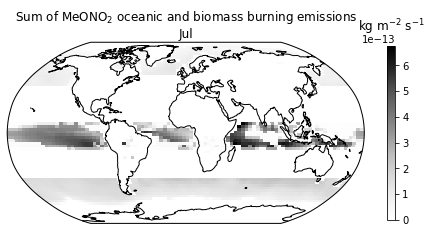

In [5]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
p0 = ax.pcolormesh(lons_cyc, lats, meono2_oc_plus_bb_cyc[7,...].data, transform=ccrs.PlateCarree(), cmap='Greys')
ax.coastlines()
ax.set_title('Sum of $MeONO_2$ oceanic and biomass burning emissions\nJul')
cb0 = fig.colorbar(p0, ax=ax, shrink=0.4)
cb0.ax.set_title('kg $m^{-2}$ $s^{-1}$', pad=15);

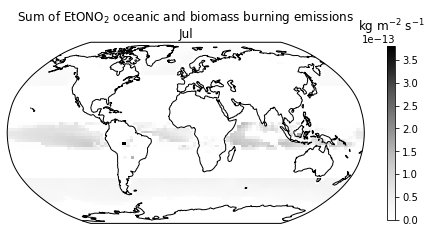

In [6]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
p0 = ax.pcolormesh(lons_cyc, lats, etono2_oc_plus_bb_cyc[7,...].data, transform=ccrs.PlateCarree(), cmap='Greys')
ax.coastlines()
ax.set_title('Sum of $EtONO_2$ oceanic and biomass burning emissions\nJul')
cb0 = fig.colorbar(p0, ax=ax, shrink=0.4)
cb0.ax.set_title('kg $m^{-2}$ $s^{-1}$', pad=15);

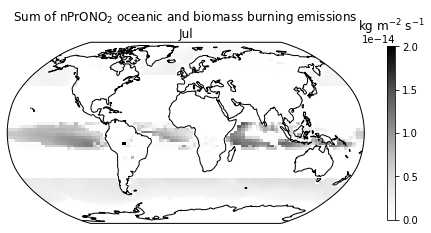

In [7]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
p0 = ax.pcolormesh(lons_cyc, lats, nprono2_oc_plus_bb_cyc[7,...].data, transform=ccrs.PlateCarree(), cmap='Greys')
ax.coastlines()
ax.set_title('Sum of $nPrONO_2$ oceanic and biomass burning emissions\nJul')
cb0 = fig.colorbar(p0, ax=ax, shrink=0.4)
cb0.ax.set_title('kg $m^{-2}$ $s^{-1}$', pad=15);

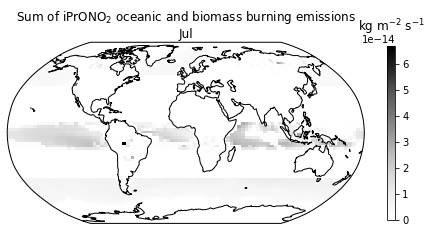

In [8]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))
p0 = ax.pcolormesh(lons_cyc, lats, iprono2_oc_plus_bb_cyc[7,...].data, transform=ccrs.PlateCarree(), cmap='Greys')
ax.coastlines()
ax.set_title('Sum of $iPrONO_2$ oceanic and biomass burning emissions\nJul')
cb0 = fig.colorbar(p0, ax=ax, shrink=0.4)
cb0.ax.set_title('kg $m^{-2}$ $s^{-1}$', pad=15);

In [9]:
# Save iris cubes to .nc
iris.save(meono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_meono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))
iris.save(etono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_etono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))
iris.save(nprono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_nprono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))
iris.save(iprono2_oc_plus_bb, str(path_to_rono2_emis / 'perpetual_iprono2_sum_of_oceanic_and_biomass_burning_emissions.nc'))